<a href="https://colab.research.google.com/github/oliveirarisla/extens-opandas/blob/main/Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Python Pandas

Projeto final do curso de extensão **análise dados na prática com Python Pandas** a fim de avaliação. 


Serão analisados os **Indicadores de Segurança Pública**, através das ocorrências nos **Estados Brasileiros** no ano de **2022**.

Os dados foram retirados do [portal](https://dados.gov.br/home) Brasileiro de Dados Abertos.


---



Autor: Arisla Santos de Oliveira


Data: 10/02/2023

In [ ]:
print('Hello World!')

Hello World!


In [ ]:
import pandas as pd

ocorrencias_df = pd.read_excel("indicadoressegurancapublicauf2022.xlsx")
display(ocorrencias_df)

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0
...,...,...,...,...,...
2090,Tocantins,Furto de veículo,2022,setembro,123
2091,Tocantins,Homicídio doloso,2022,setembro,20
2092,Tocantins,Roubo de veículo,2022,setembro,26
2093,Tocantins,Roubo seguido de morte (latrocínio),2022,setembro,1


In [ ]:
import numpy as np

In [ ]:
#Remover a coluna Ano, pois já sabemos que o recorte vai ser 2022
ocorrencias_df.drop(labels=['Ano'], axis=1, inplace=True)
print(ocorrencias_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UF           2095 non-null   object
 1   Tipo Crime   2095 non-null   object
 2   Mês          2095 non-null   object
 3   Ocorrências  2095 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 65.6+ KB
None




---

#**Brasil 2022**

***Total de ocorrências***

In [214]:
total_df = ocorrencias_df[['Ano', 'Ocorrências']].groupby(by='Ano').sum()
total_df.reset_index(inplace=True)
display(total_df.sort_values(by='Ocorrências'))

,Ano,Ocorrências
0,2022,367331


***Quantidade de ocorrências por tipo de crime***

In [ ]:
soma_ocorrencia_df = ocorrencias_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
soma_ocorrencia_df.reset_index(inplace=True)
display(soma_ocorrencia_df.sort_values(by='Ocorrências'))

,Tipo Crime,Ocorrências
4,Roubo a instituição financeira,190
3,Lesão corporal seguida de morte,415
7,Roubo seguido de morte (latrocínio),896
5,Roubo de carga,9490
8,Tentativa de homicídio,22610
2,Homicídio doloso,27673
0,Estupro,42793
6,Roubo de veículo,102414
1,Furto de veículo,160850


***Média da quantidade de ocorrências por tipo de crime por Estado mais o Distrito Federal***

In [ ]:
media_ocorrencia_df = ocorrencias_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').mean().round(2)
display(media_ocorrencia_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,0.88
Lesão corporal seguida de morte,1.89
Roubo seguido de morte (latrocínio),3.83
Roubo de carga,44.35
Tentativa de homicídio,93.43
Homicídio doloso,113.88
Estupro,176.83
Roubo de veículo,423.20
Furto de veículo,664.67


***UF que teve mais ocorrências com o tipo de crime e mês de referência***

In [ ]:
display(ocorrencias_df[['UF', 'Mês', 'Tipo Crime', 'Ocorrências']].max())

UF                          Tocantins
Mês                          setembro
Tipo Crime     Tentativa de homicídio
Ocorrências                      8525
dtype: object

***UF que teve menos ocorrências com tipo de crime e mês de referência***

In [ ]:
display(ocorrencias_df[['UF', 'Mês', 'Tipo Crime', 'Ocorrências']].min())

UF                Acre
Mês              abril
Tipo Crime     Estupro
Ocorrências          0
dtype: object



---

# **Estado de São Paulo em 2022**

***Listagem de ocorrências dispostas em ordem crescente a fim de analisar menor e maior números de ocorrência para um tipo de crime e o mês de referência***


In [ ]:
ocorrencias_sp_df = ocorrencias_df.loc[(ocorrencias_df['UF'] == 'São Paulo')]
display(ocorrencias_sp_df.sort_values(by='Ocorrências'))

,UF,Tipo Crime,Ano,Mês,Ocorrências
1950,São Paulo,Roubo a instituição financeira,2022,setembro,0
1914,São Paulo,Roubo a instituição financeira,2022,maio,1
1896,São Paulo,Roubo a instituição financeira,2022,março,1
1878,São Paulo,Roubo a instituição financeira,2022,janeiro,1
1887,São Paulo,Roubo a instituição financeira,2022,fevereiro,1
...,...,...,...,...,...
1938,São Paulo,Furto de veículo,2022,agosto,7545
1911,São Paulo,Furto de veículo,2022,maio,7580
1920,São Paulo,Furto de veículo,2022,junho,7677
1893,São Paulo,Furto de veículo,2022,março,8296


***Total de ocorrências por mês em ordem crescente***

In [ ]:
oc_sp_mes_df = ocorrencias_sp_df[['Mês', 'Ocorrências']].groupby(by='Mês').sum()
display(oc_sp_mes_df.sort_values(by='Ocorrências'))

,Ocorrências
Mês,
fevereiro,11585
abril,11766
janeiro,11923
julho,12749
agosto,12773
junho,12835
maio,13024
setembro,13932
março,14122


In [ ]:
#Remover colunas mês e ano para analisar os dados anuais
ocorrencias_sp_df.drop(labels=['Mês'], axis=1, inplace=True)
ocorrencias_sp_df.drop(labels=['Ano'], axis=1, inplace=True)
print(ocorrencias_sp_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1874 to 1954
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UF           81 non-null     object
 1   Tipo Crime   81 non-null     object
 2   Ocorrências  81 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


***Tipos de crimes e a quantidade total de suas ocorrências no ano de 2022***

In [ ]:
ocorrencias_sp_ano_df = ocorrencias_sp_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
display(ocorrencias_sp_ano_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,13
Lesão corporal seguida de morte,74
Roubo seguido de morte (latrocínio),124
Homicídio doloso,2135
Tentativa de homicídio,2340
Roubo de carga,4725
Estupro,9484
Roubo de veículo,28252
Furto de veículo,67562




---

# **Regiões**

In [ ]:
# Importar planilha com as respectivas regiões dos Estados
regioes_df = pd.read_excel("regioes.xlsx")
display(regioes_df)

,Região,UF
0,Centro-Oeste,Goiás
1,Centro-Oeste,Mato Grosso
2,Centro-Oeste,Mato Grosso do Sul
3,Centro-Oeste,Distrito Federal
4,Norte,Acre
5,Norte,Amazonas
6,Norte,Amapá
7,Norte,Pará
8,Norte,Rondônia
9,Norte,Roraima


In [ ]:
# Criar nova coluna na planilha principal e fundir as regiões aos seus respectivos estados
reg = ['UF']
ocorrencias1_df = ocorrencias_df.merge(regioes_df, how="inner", on=reg)
display(ocorrencias1_df)

,UF,Tipo Crime,Mês,Ocorrências,Região
0,Acre,Estupro,janeiro,31,Norte
1,Acre,Furto de veículo,janeiro,50,Norte
2,Acre,Homicídio doloso,janeiro,10,Norte
3,Acre,Lesão corporal seguida de morte,janeiro,1,Norte
4,Acre,Roubo a instituição financeira,janeiro,0,Norte
...,...,...,...,...,...
2090,Tocantins,Furto de veículo,setembro,123,Norte
2091,Tocantins,Homicídio doloso,setembro,20,Norte
2092,Tocantins,Roubo de veículo,setembro,26,Norte
2093,Tocantins,Roubo seguido de morte (latrocínio),setembro,1,Norte


***Total de ocorrências em cada região por ordem crescente***

In [216]:
regioes_df = ocorrencias1_df[['Tipo Crime', 'Ocorrências', 'Região']].groupby(by='Região').sum()
display(regioes_df.sort_values(by='Ocorrências'))

,Ocorrências
Região,
Centro-Oeste,22997
Norte,25582
Sul,45511
Nordeste,86405
Sudeste,186836


In [211]:
import matplotlib.pyplot as plt

<Figure size 1152x576 with 0 Axes>

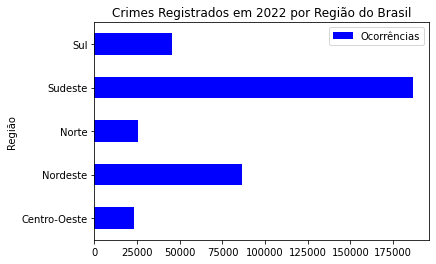

In [213]:
plt.figure(figsize=(16,8))
regioes_df.plot(
    kind="barh",
    xlabel="Região",
    ylabel="Ocorrências",
    title="Crimes Registrados em 2022 por Região do Brasil",
    color="blue",
)
plt.show()



---



***Norte***


*   Acre
*   Amazonas
* Amapá
* Pará
* Rondônia
* Roraíma
* Tocantins



*Total de ocorrências por tipo de crime*

In [ ]:
norte_df = ocorrencias1_df.loc[(ocorrencias1_df['Região'] == 'Norte')]
soma_norte_df = norte_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
display(soma_norte_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,19
Lesão corporal seguida de morte,67
Roubo de carga,125
Roubo seguido de morte (latrocínio),154
Tentativa de homicídio,2447
Homicídio doloso,3547
Estupro,5202
Roubo de veículo,5385
Furto de veículo,8636


*Média das ocorrências por tipo de crime entre os 7 Estados da região Norte*

In [ ]:
media_norte_df = norte_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').mean().round(2)
display(media_norte_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,0.40
Lesão corporal seguida de morte,1.43
Roubo seguido de morte (latrocínio),2.75
Roubo de carga,2.98
Tentativa de homicídio,38.84
Homicídio doloso,56.30
Estupro,82.57
Roubo de veículo,85.48
Furto de veículo,137.08


***Nordeste***

* Alagoas
* Bahia
* Ceará
* Maranhão
* Piauí
* Pernambuco
* Paraíba
* Rio Grande do Norte 
* Sergipe

*Total de ocorrências por tipo de crime*

In [ ]:
nordeste_df = ocorrencias1_df.loc[(ocorrencias1_df['Região'] == 'Nordeste')]
soma_nordeste_df = nordeste_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
display(soma_nordeste_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,42
Lesão corporal seguida de morte,131
Roubo seguido de morte (latrocínio),336
Roubo de carga,604
Tentativa de homicídio,6577
Estupro,9482
Homicídio doloso,12443
Furto de veículo,21074
Roubo de veículo,35716


*Média das ocorrências por tipo de crime entre os 9 Estados da região Nordeste*

In [183]:
media_nordeste_df = nordeste_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').mean().round(2)
display(media_nordeste_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,0.57
Lesão corporal seguida de morte,1.75
Roubo seguido de morte (latrocínio),4.20
Roubo de carga,8.05
Tentativa de homicídio,82.21
Estupro,118.52
Homicídio doloso,153.62
Furto de veículo,263.42
Roubo de veículo,446.45


***Centro-Oeste***
* Goiás
* Mato Grosso
* Mato Grosso do Sul
* Distrito Federal

*Total de ocorrências por tipo de crime*

In [ ]:
centro_oeste_df = ocorrencias1_df.loc[(ocorrencias1_df['Região'] == 'Centro-Oeste')]
soma_centro_df = centro_oeste_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
display(soma_centro_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,2
Lesão corporal seguida de morte,29
Roubo seguido de morte (latrocínio),64
Roubo de carga,316
Homicídio doloso,2006
Tentativa de homicídio,2657
Roubo de veículo,3281
Estupro,3942
Furto de veículo,10700


*Média das ocorrências por tipo de crime entre os 3 Estados da região Centro-Oeste mais o Distrito Federal*

In [184]:
media_co_df = centro_oeste_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').mean().round(2)
display(media_co_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,0.06
Lesão corporal seguida de morte,0.83
Roubo seguido de morte (latrocínio),1.83
Roubo de carga,9.29
Homicídio doloso,55.72
Tentativa de homicídio,73.81
Roubo de veículo,91.14
Estupro,109.50
Furto de veículo,297.22


***Sudeste***
* Espírito Santo
* Minas Gerais
* Rio de Janeiro
* São Paulo 

*Total de ocorrências por tipo de crime*

In [ ]:
sudeste_df = ocorrencias1_df.loc[(ocorrencias1_df['Região'] == 'Sudeste')]
soma_sudeste_df = sudeste_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
display(soma_sudeste_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,110
Lesão corporal seguida de morte,123
Roubo seguido de morte (latrocínio),244
Homicídio doloso,6709
Tentativa de homicídio,7705
Roubo de carga,7971
Estupro,15291
Roubo de veículo,51156
Furto de veículo,97527


*Média das ocorrências por tipo de crime entre os 4 Estados da região Sudeste*

In [185]:
media_sudeste_df = sudeste_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').mean().round(2)
display(media_sudeste_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,3.06
Lesão corporal seguida de morte,3.42
Roubo seguido de morte (latrocínio),6.78
Homicídio doloso,186.36
Tentativa de homicídio,214.03
Roubo de carga,221.42
Estupro,424.75
Roubo de veículo,1421.00
Furto de veículo,2709.08


***Sul***
* Paraná
* Rio Grande do Sul
* Santa Catarina

*Total de ocorrências por tipo de crime*

In [182]:
sul_df = ocorrencias1_df.loc[(ocorrencias1_df['Região'] == 'Sul')]
soma_sul_df = sul_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').sum()
display(soma_sul_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,17
Lesão corporal seguida de morte,65
Roubo seguido de morte (latrocínio),98
Roubo de carga,474
Homicídio doloso,2968
Tentativa de homicídio,3224
Roubo de veículo,6876
Estupro,8876
Furto de veículo,22913


*Média das ocorrências por tipo de crime entre os 3 Estados da região Sul*

In [186]:
media_sul_df = sul_df[['Tipo Crime', 'Ocorrências']].groupby(by='Tipo Crime').mean().round(2)
display(media_sul_df.sort_values(by='Ocorrências'))

,Ocorrências
Tipo Crime,
Roubo a instituição financeira,0.63
Lesão corporal seguida de morte,2.41
Roubo seguido de morte (latrocínio),3.63
Roubo de carga,17.56
Homicídio doloso,109.93
Tentativa de homicídio,119.41
Roubo de veículo,254.67
Estupro,328.74
Furto de veículo,848.63
